In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai import *
from fastai.vision import *

In [0]:
data = (ImageList.from_folder('/content/drive/My Drive/emotion_detection/spectrogram')
        .split_by_folder()        
        .label_from_folder()
        .transform(get_transforms(do_flip=False), size=64)
        .databunch()
        .normalize(imagenet_stats))                  

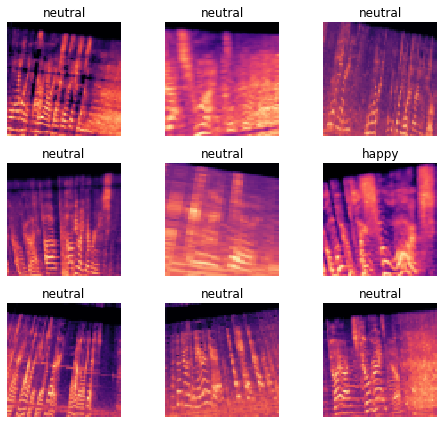

In [10]:
data.show_batch(rows=3, figsize=(7,6))

In [11]:
print (data.classes)

['disgust', 'fear', 'happy', 'neutral', 'sad']


In [0]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

In [0]:
learn.fit_one_cycle(7)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.223777,1.373313,0.565060,0.434940,34:52
1,1.488948,1.178948,0.456627,0.543373,04:40
2,1.233753,1.098734,0.383133,0.616867,04:37
3,1.170835,1.085508,0.375904,0.624096,04:35


In [0]:
learn.lr_find()

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

In [0]:
learn.save('/content/drive/My Drive/emotion_detection/model')